In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import scipy.optimize as op
import emcee
import corner

In [3]:
% matplotlib inline

In [51]:
### Define parameters and datasets
m_true = -0.9594
b_true = 4.294
f_true = 0.534

### Define x values and the linear equation with above given parameters
N = 50
x = np.sort(10*np.random.rand(N))
y = m_true * x + b_true
u = m_true * x + b_true

### Define error and randomly select variation in data points
yerr = 0.1 + 0.5 * np.random.rand(N)
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [52]:
### Define functions for the maximum likelihood calculation
def max_like(theta, x, y, yerr):
    m, b, lnf = theta
    linear_model = m * x + b
    inverse_s_sqrd = 1. / (yerr**2 + (linear_model**2) * np.exp(2*lnf))
    return (-0.5) * (np.sum(((y - linear_model)**2) * inverse_s_sqrd - np.log(inverse_s_sqrd)))

### Define parameters for max likelihood plot 
nll = lambda *args: -max_like(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args = (x, y, yerr))
m_ml, b_ml, f_ml = result["x"]
linn = m_ml * x + b_ml

### Define parameters and linear function for data by linear least squares argument 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

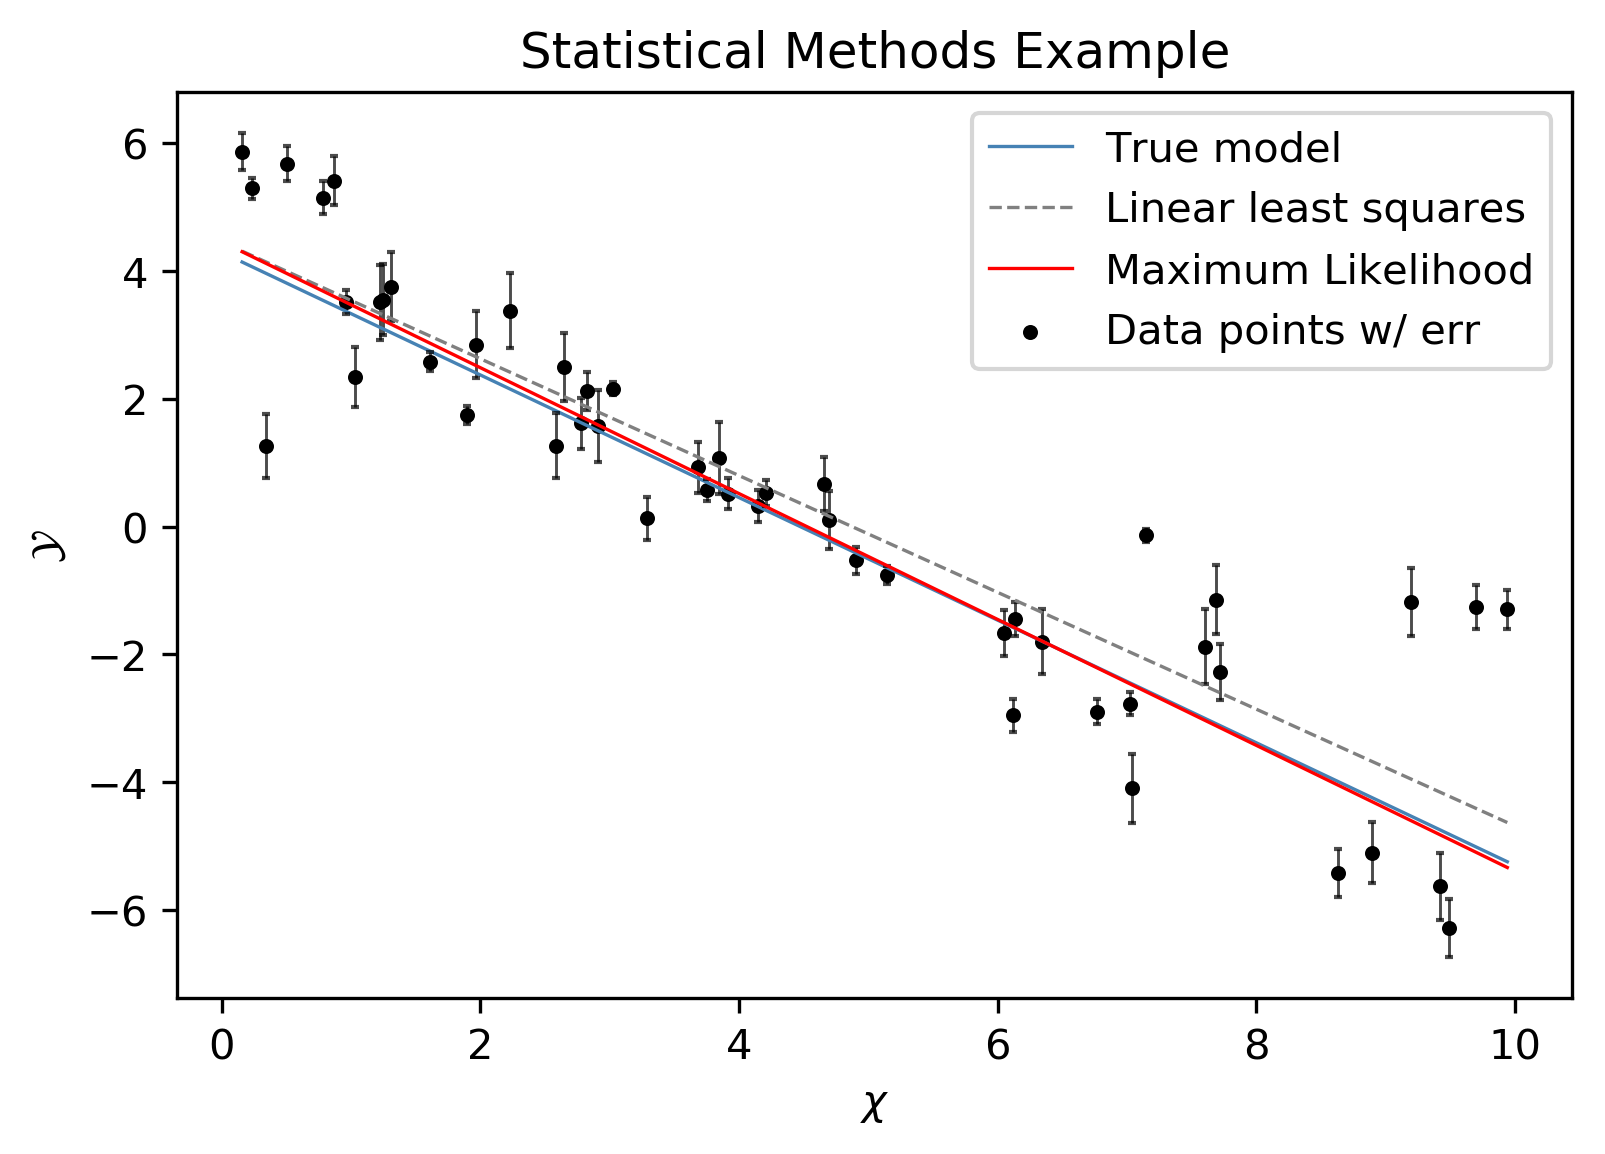

In [53]:
### Plot a line with above arguments
plt.plot(x,u, linewidth = .8, color = 'steelblue', label = 'True model')

### Plot data with errorbars using random values from above
plt.scatter(x, y, marker = '.', linewidth = .6, color = 'black', label = 'Data points w/ err ')
plt.errorbar(x,y, yerr = yerr, fmt = 'none', capsize =1, linewidth = .7, color = 'black', alpha = .7)

### Plot a line using linear least squares argument
plt.plot(x, line, linewidth = .8, color = 'grey', linestyle = '--', label = 'Linear least squares' )

### Plot maximum likelihood
plt.plot(x, linn, linewidth = .8, color = 'r', label = 'Maximum Likelihood')

### Graphics
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\mathcal{Y}$')
plt.legend()
plt.title("Statistical Methods Example")

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

In [8]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + max_like(theta, x, y, yerr)

In [9]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

In [10]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (x, y, yerr))

In [11]:
sampler.run_mcmc(pos, 500)

(array([[-0.92737821,  4.05744401, -0.4392732 ],
        [-0.97656702,  4.44782504, -0.64491104],
        [-1.24279027,  5.80727257, -0.72943289],
        [-0.93103644,  4.20997151, -0.61228877],
        [-1.11265086,  4.93588459, -0.54367527],
        [-1.17907664,  5.2483387 , -0.86596054],
        [-0.95069894,  4.25176999, -0.62696822],
        [-1.12152206,  5.00504566, -0.84772987],
        [-1.09424426,  4.87146774, -0.4871373 ],
        [-1.14515185,  5.10271197, -0.29627553],
        [-1.01661961,  4.53805355, -0.48629566],
        [-0.99208071,  4.4787595 , -0.65805414],
        [-1.02361878,  4.72763126, -0.3673288 ],
        [-0.96033819,  4.26947818, -0.52334984],
        [-1.05422343,  4.77311913, -0.46071655],
        [-1.09352573,  4.857851  , -0.72038566],
        [-0.93437399,  4.20991104, -0.52455571],
        [-0.98988822,  4.49094122, -0.76011979],
        [-1.05176559,  4.67578082, -0.39332421],
        [-1.20767553,  5.55010977, -0.76352202],
        [-0.83965837

In [12]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

[[-0.94177831  4.2576583  -0.57906279]
 [-0.94177831  4.2576583  -0.57906279]
 [-0.93904685  4.24321342 -0.63824098]
 ...
 [-1.07587804  4.98226314 -0.55001701]
 [-1.12637159  5.22829159 -0.72653259]
 [-1.11100607  5.14823879 -0.71816063]]


(array([   20.,   220.,  1708.,  7710., 14527., 13658.,  5785.,  1194.,
          159.,    19.]),
 array([-1.41876551, -1.33373928, -1.24871306, -1.16368684, -1.07866062,
        -0.99363439, -0.90860817, -0.82358195, -0.73855573, -0.6535295 ,
        -0.56850328]),
 <a list of 10 Patch objects>)

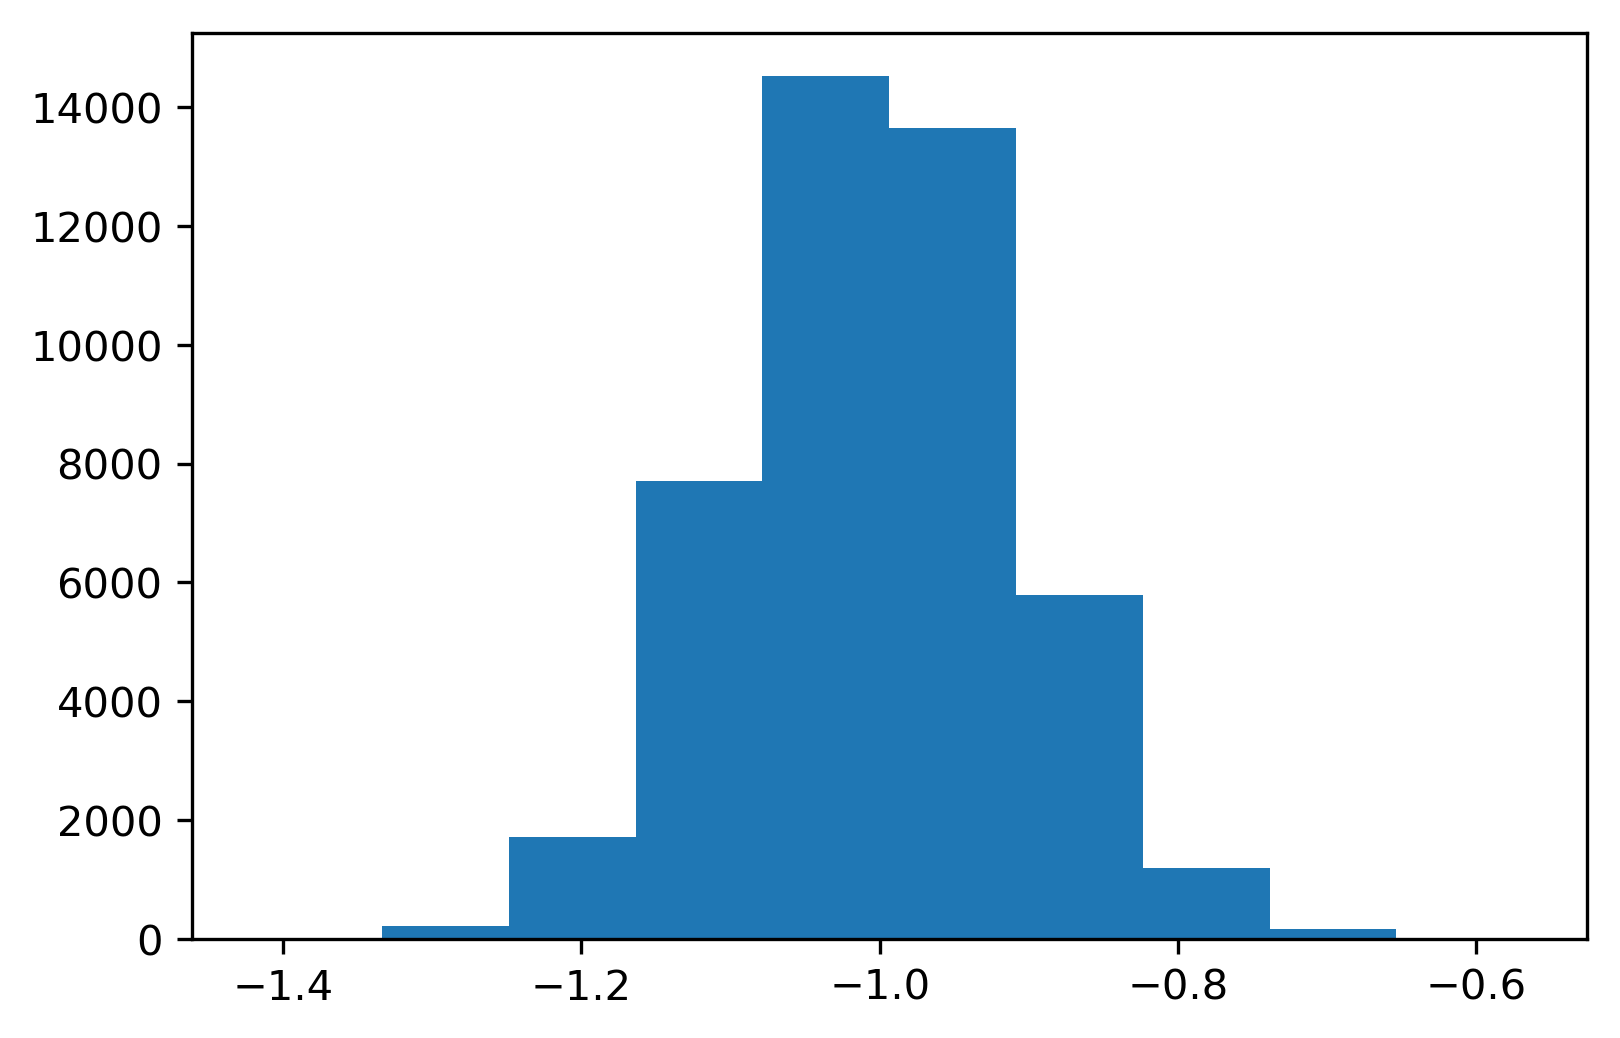

In [13]:
print (samples)
np.shape(samples)
plt.hist(samples[:,0])

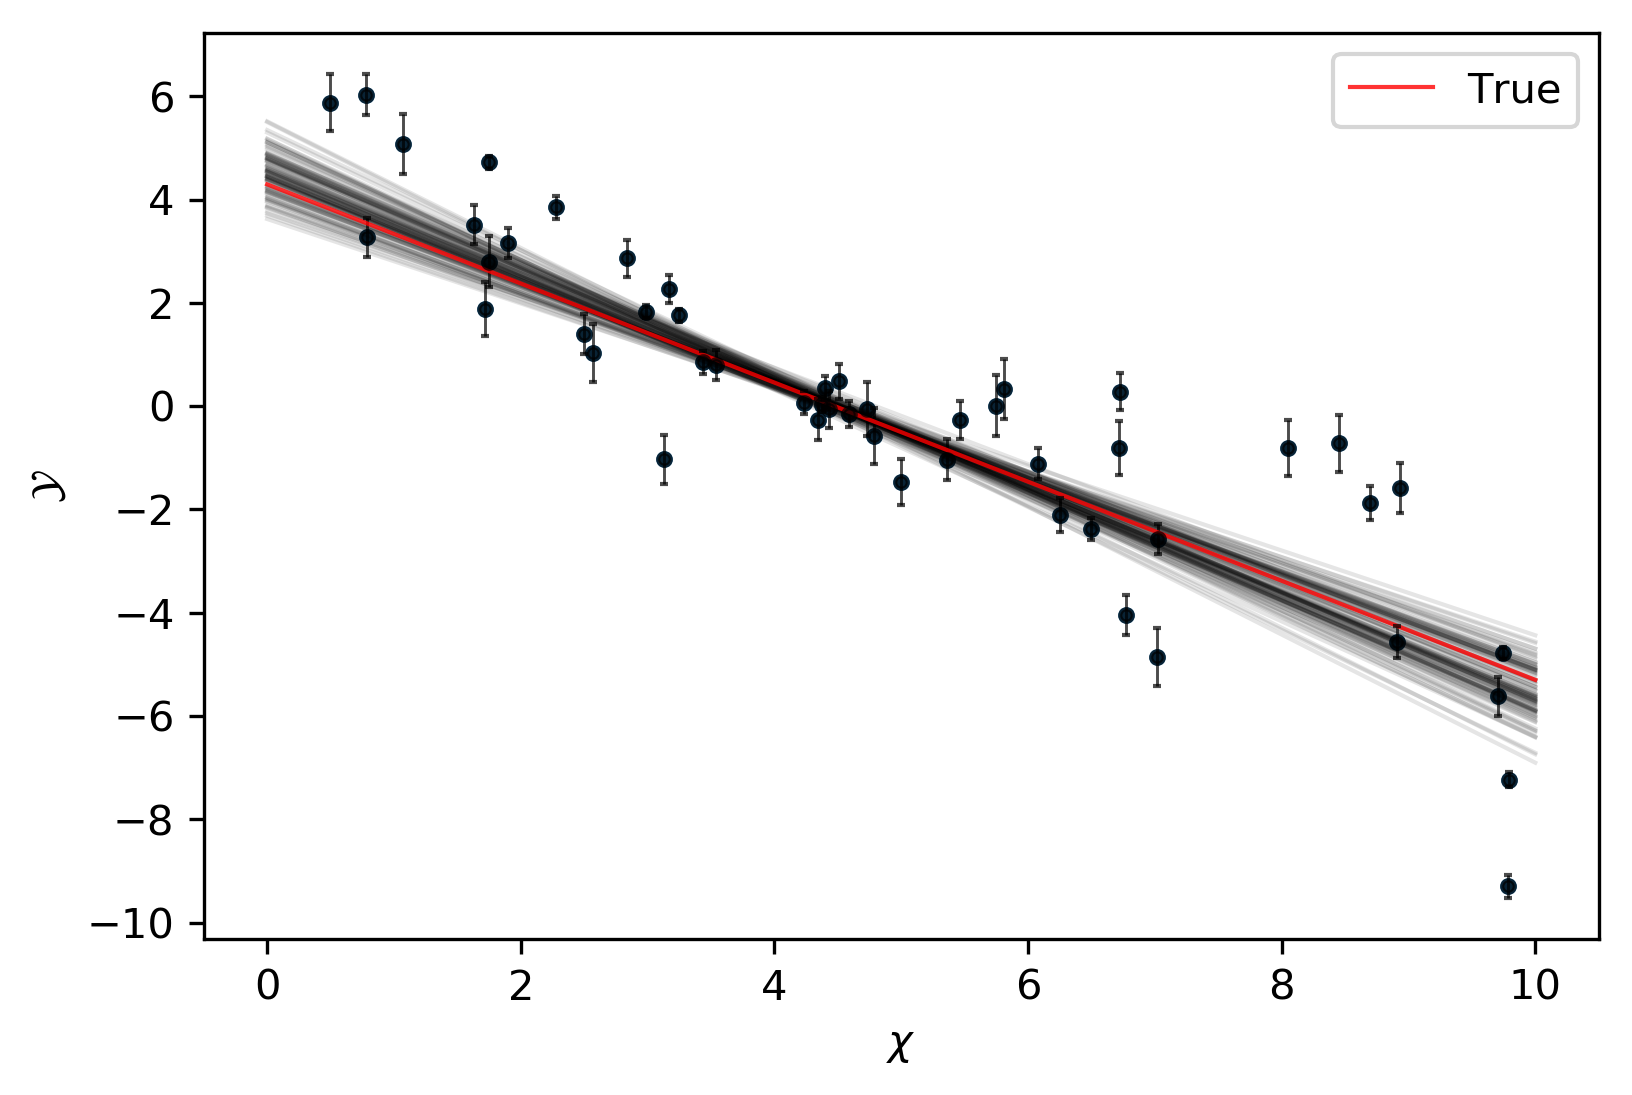

In [14]:
### Plot a line with above arguments
# plt.plot(x,u, linewidth = .8, color = 'steelblue', label = 'True model')

### Plot data with errorbars using random values from above
plt.scatter(x, y, marker = '.', linewidth = 1)
# plt.errorbar(x,y, yerr = yerr,)

### Plot a line using linear least squares argument
# plt.plot(x, line, linewidth = .8, color = 'grey', linestyle = '--', label = 'Linear least squares' )

### Plot maximum likelihood
# plt.plot(x, linn, linewidth = .8, color = 'r', label = 'Maximum Likelihood')




xl = np.array([0,10])
for m, b, lnf in samples[np.random.randint(len(samples), size = 100)]:
    plt.plot(xl, m * xl + b, color = 'k', alpha = 0.1, linewidth = 1, label = '')
plt.plot(xl, m_true * xl + b_true, color = 'r', lw = 1, alpha = 0.8, label = 'True')
# plt.errorbar(x, y, yerr = yerr, fmt = '.k')
plt.errorbar(x,y, yerr = yerr,  capsize =1, fmt = '.k',linewidth = .7, color = 'black', alpha = .7)


### Graphics
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\mathcal{Y}$')

plt.legend()

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300


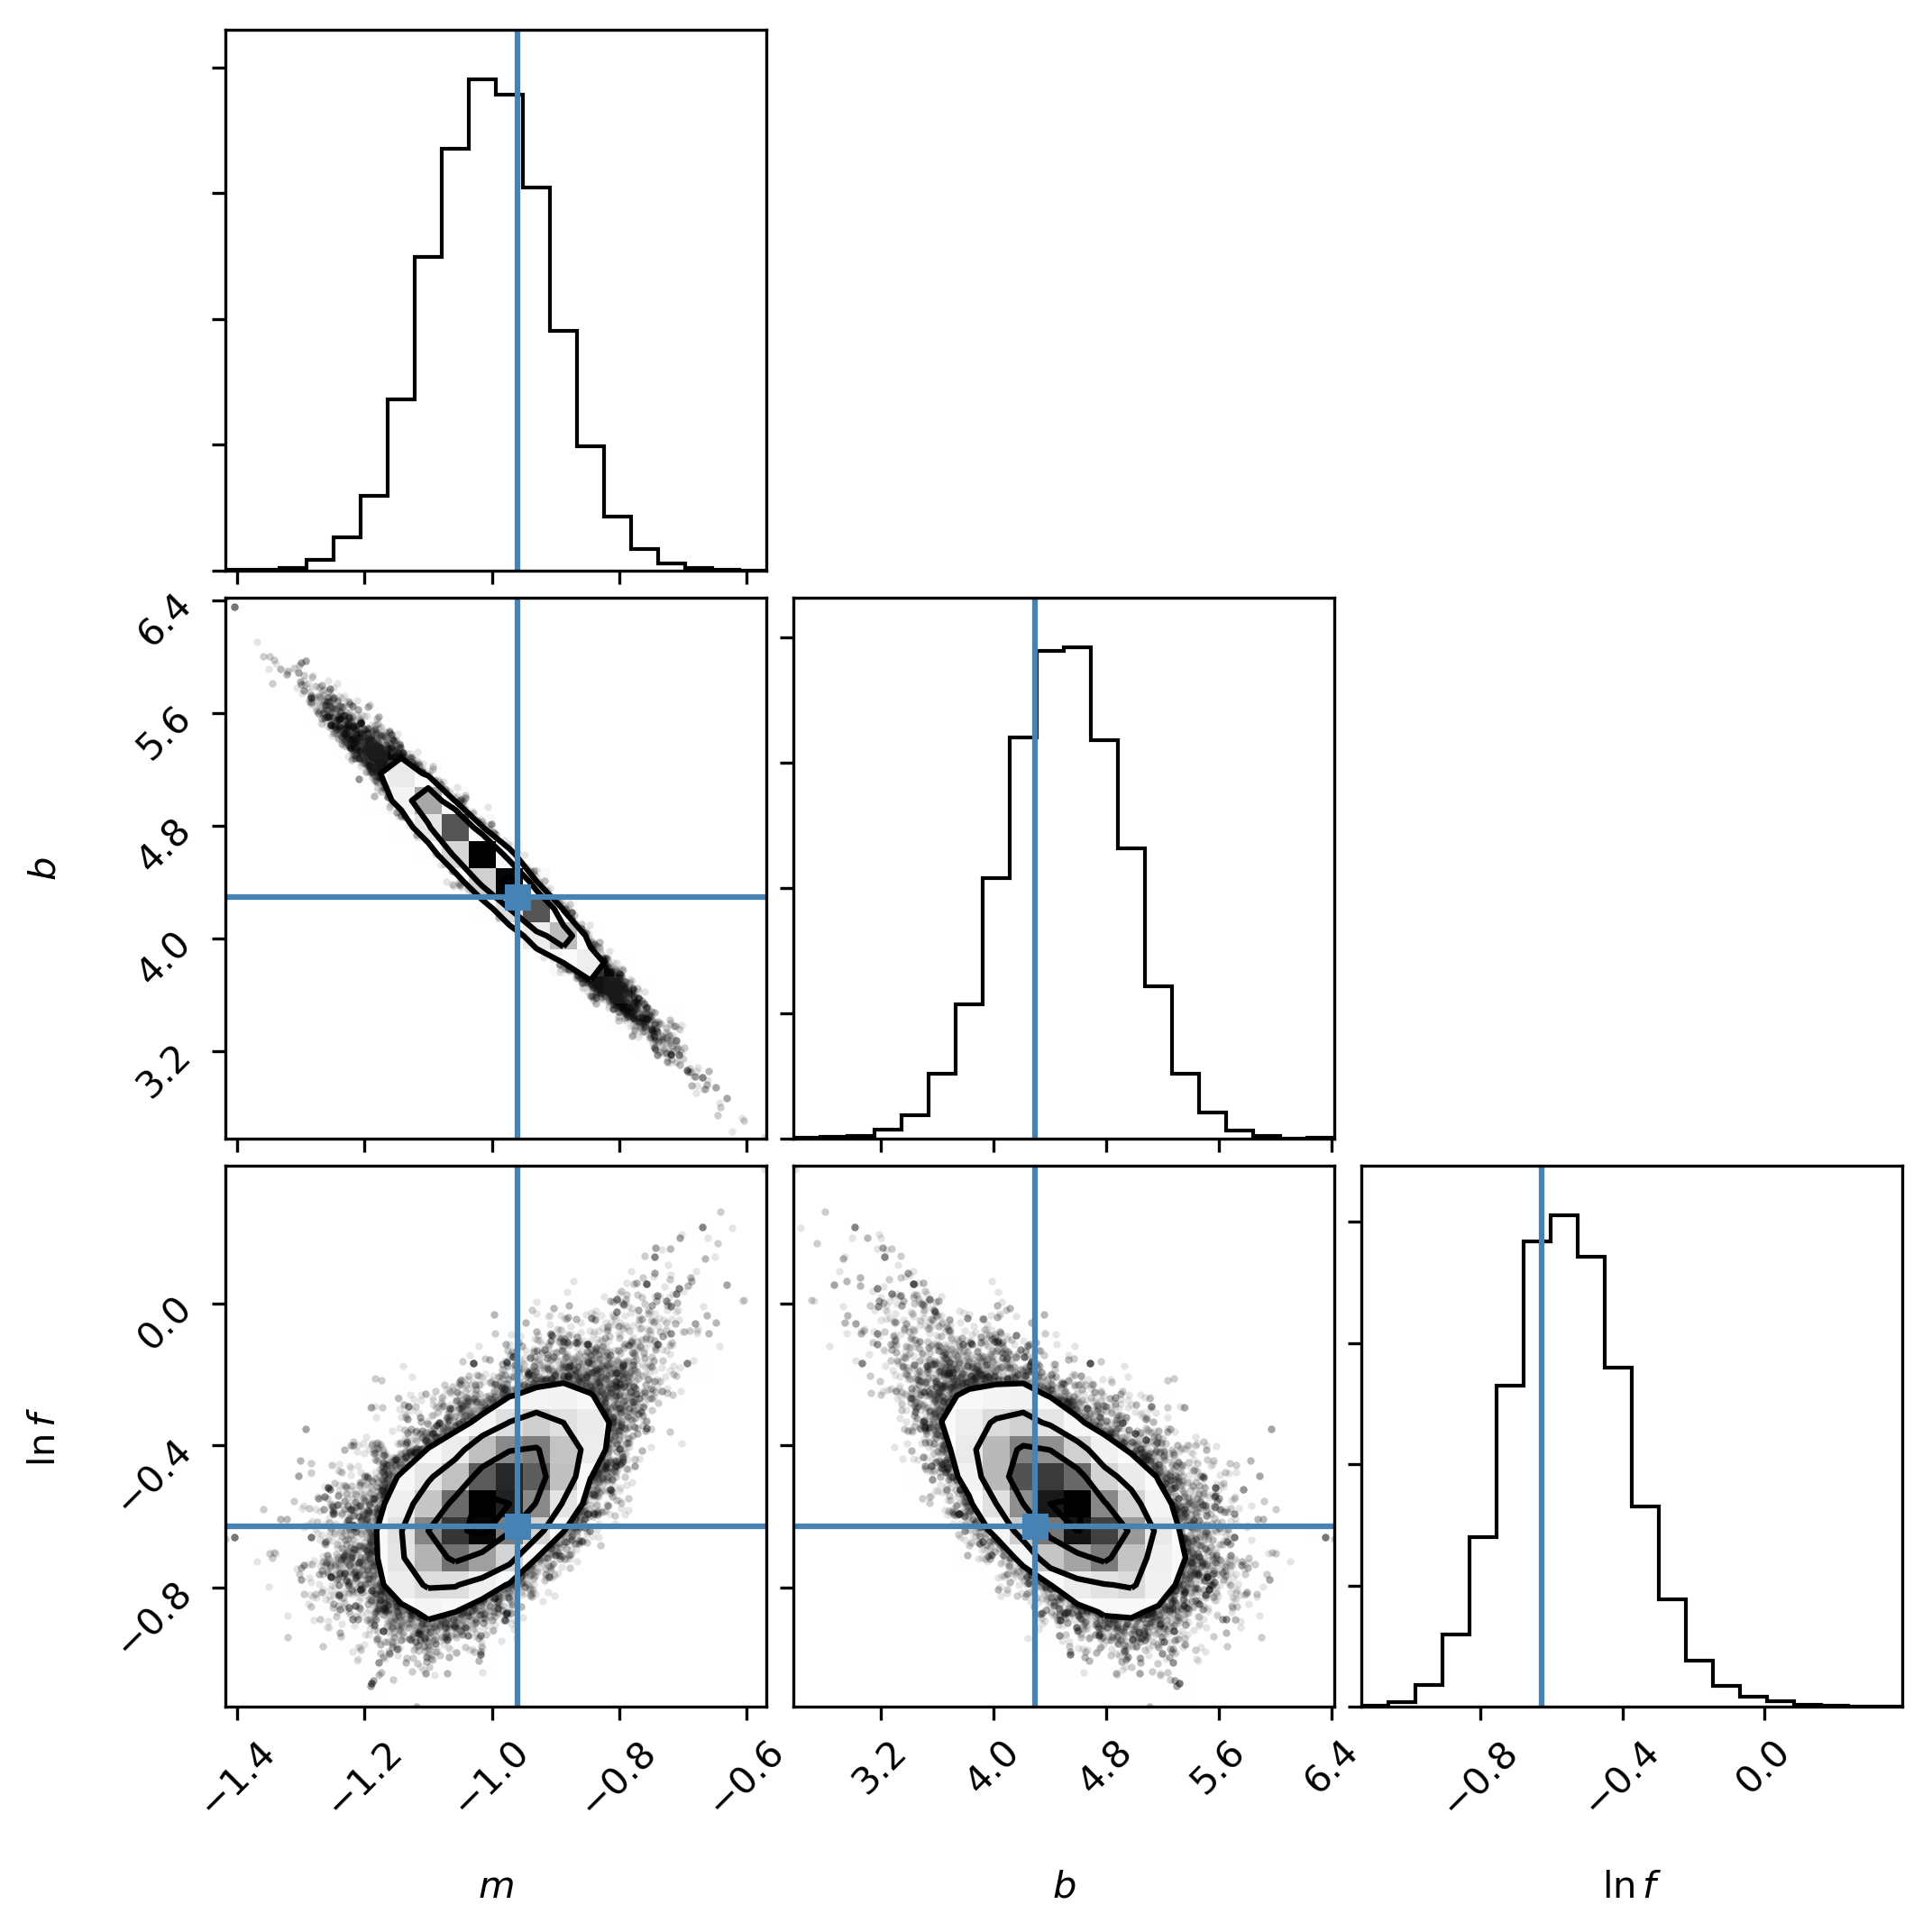

In [16]:
figure = corner.corner(samples, labels = ["$m$", "$b$", "$\ln\,f$"],
                            truths = [m_true, b_true, np.log(f_true)])
figure.savefig("triangle.png")

In [252]:
# A = np.vstack((np.ones_like(x), x)).T
# C = np.diag(yerr * yerr)
# cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A )))
# b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))


# print (b_ls, m_ls)
# print ('\n', cov)
# print ('\n', C)
# print ('\n\n', A)